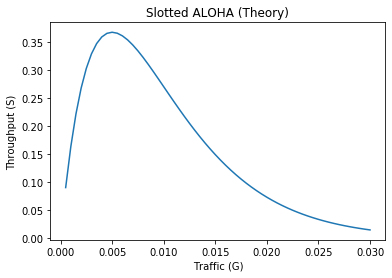

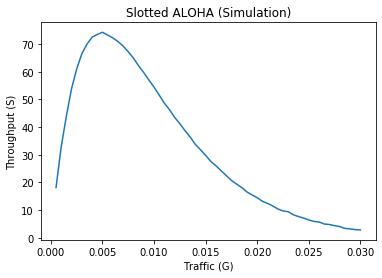

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# global parameters
slots = 10**5
stations = 200
data_birth_rate = np.arange(0.0005,0.0305,0.0005)

# calculate throughput by theory
def theory(G):
    G *= stations
    return G * np.exp(-G) 
    pass

# calculate data birth interval
def interval(lambd):
    return (-1/lambd) * np.log(random.random())
    pass

# calculate throughput by simulation
def simulation(lambd):
    
    # state: 0 free; 1 success; >1 collision
    state = [0 for i in range(slots)]
    
    for i in range(slots):
        for j in range(stations):
            if random.random() <= lambd:
                state[i] += 1
    
    success = 0
    for i in range(slots):
        if state[i] == 1:
            success += 1

    return float(success)/slots * stations
    pass

# plot graphs
def plotter(data):
    
    data['theoretical throughput'] = data['Avg Load'].apply(theory)
    plt.plot(data['Avg Load'], data['theoretical throughput'])
    plt.xlabel("Traffic (G)")
    plt.ylabel("Throughput (S)")
    plt.title('Slotted ALOHA (Theory)')
    plt.show() 

    data['simulated throughput'] = data['Avg Load'].apply(simulation)
    plt.plot(data['Avg Load'], data['simulated throughput'])
    plt.xlabel("Traffic (G)")
    plt.ylabel("Throughput (S)")
    plt.title('Slotted ALOHA (Simulation)')
    plt.show() 
    pass

if __name__ == "__main__":
    data = { "Avg Load" : data_birth_rate}
    df = pd.DataFrame(data)
    plotter(df)